# Analysis of Harvey flooding

Estimation of water input to Galveston Bay due to Hurricane Harvey precipitation.

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from matplotlib.dates import date2num
import numpy as np
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean.cm as cmo
import os
from collections import OrderedDict

In [27]:
land_10m = cartopy.feature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face',
                                        facecolor=cartopy.feature.COLORS['land'])
pc = cartopy.crs.PlateCarree()
merc = cartopy.crs.Mercator(central_longitude=-85.0)

plots = {'Water Level [m]': {'color': 'r', 'marker': 'o', 'ms': 10, 'alpha': 0.5}, 
         'WaterT [deg C]': {'color': 'b', 'marker': '.', 'ms': 10, 'alpha': 0.5}, 
         'Depth [m]': {'color': 'r', 'marker': 'o', 'ms': 10, 'alpha': 0.5},  
         'East [m/s]': {'color': 'g', 'marker': '>', 'ms': 10, 'alpha': 0.25}, 
         'North [m/s]': {'color': 'g', 'marker': '>', 'ms': 10, 'alpha': 0.25}, 
         'Salinity': {'color': 'k', 'marker': '*', 'ms': 10, 'alpha': 0.5}, 
         'Along [cm/s]': {'color': 'darkcyan', 'marker': '^', 'ms': 10, 'alpha': 0.5},
         'Across [cm/s]': {'color': 'darkcyan', 'marker': '^', 'ms': 10, 'alpha': 0.5}}

base = 'drive_data/'

In [28]:
# read in buoy info
bys = pd.read_csv(base + 'buoys.csv', index_col=0).to_dict('index')

buoys = {'BOLI': {'ll': ([-94.783, 29.342]), 'color': '#689F38', 'vars': ['WaterT [deg C]', 'Depth [m]', 'Salinity']},
         'MIDG': {'ll': ([-94.875, 29.508]),  'color': '#FBC02D', 'vars': ['WaterT [deg C]', 'Depth [m]', 'Salinity']},
         'FISH': {'ll': ([-94.854, 29.670]),  'color': '#F57C00', 'vars': ['WaterT [deg C]', 'Depth [m]', 'Salinity']},
         'TRIN': {'ll': ([-94.746, 29.661]),  'color': '#FFA000', 'vars': ['WaterT [deg C]', 'Depth [m]', 'Salinity']},
         'OLDR': {'ll': ([-94.783, 29.833]), 'color': '#D32F2F', 'vars': ['WaterT [deg C]', 'Depth [m]', 'Salinity']},
         '8771486': {'ll': ([bys['8771486']['lon'], bys['8771486']['lat']]),  'color': '#0097A7',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']},
         '8770613': {'ll': ([bys['8770613']['lon'], bys['8770613']['lat']]),  'color': '#E64A19',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]', 'Salinity']},
         '8771013': {'ll': ([bys['8771013']['lon'], bys['8771013']['lat']]), 'color': '#AFB42B',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]', 'Salinity']},
         '8771341': {'ll': ([bys['8771341']['lon'], bys['8771341']['lat']]), 'color': '#388E3C',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']},
         '8771450': {'ll': ([bys['8771450']['lon'], bys['8771450']['lat']]), 'color': '#00796B',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']},
         'B': {'ll': ([bys['B']['lon'], bys['B']['lat']]), 'color': '#303F9F',
                     'vars': ['AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]', 'Salinity', 'Along [cm/s]', 'Across [cm/s]']},
         'g06010': {'ll': ([bys['g06010']['lon'], bys['g06010']['lat']]), 'color': '#388E3C',
                     'vars': ['Along [cm/s]', 'Across [cm/s]']},
         '42035': {'ll': ([bys['42035']['lon'], bys['42035']['lat']]), 'color': '#5D4037',
                     'vars': ['AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']},
         '8770808': {'ll': ([bys['8770808']['lon'], bys['8770808']['lat']]), 'color': '#512DA8',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']},
         '8770777': {'ll': ([bys['8770777']['lon'], bys['8770777']['lat']]), 'color': '#C2185B',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']},
         '8770822': {'ll': ([bys['8770822']['lon'], bys['8770822']['lat']]), 'color': '#455A64',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']},
         '8770971': {'ll': ([bys['8770971']['lon'], bys['8770971']['lat']]), 'color': '#7B1FA2',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']},
         '8771972': {'ll': ([bys['8771972']['lon'], bys['8771972']['lat']]), 'color': '#0288D1',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']}
        }


buoys_ordered = ['8770777', '8770613', 'OLDR', 'FISH', 'TRIN', 'MIDG', '8771013', 'BOLI', 'g06010', '8771341',
                '8771450', '8771486', '8771972', '8770971', '8770808', 'B', '42035', '8770822']
# buoys down main bay
buoys_main = ['8770613', 'FISH', 'TRIN', 'MIDG', '8771013', 'BOLI', 'g06010', '8771341', '8771450']

In [29]:
# See make_data notebook. This reads in data from many sources, recalculates so that all data is hourly by taking 
# hourly averages, recalculates water level "sea level" by taking the mean for 3 weeks before the hurricane.
df = pd.read_csv(base + 'data.csv', parse_dates=True, index_col=0)

dstart = '2017-07-01'; dend = '2017-12-31'

# Overall view of data locations

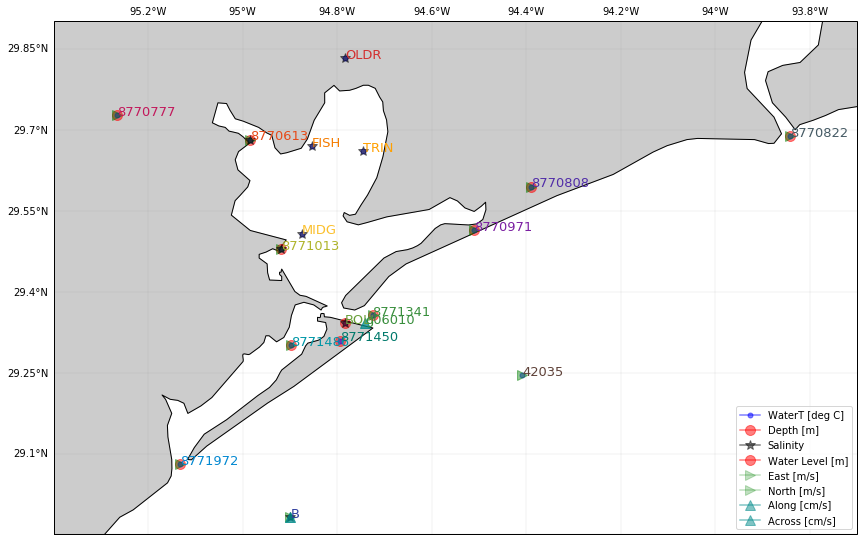

In [30]:
fig = plt.figure(figsize=(12, 8))# (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
ax.set_extent([-95.4, -93.7, 28.95, 29.9], pc)
# ax.set_extent([-95.1, -94.5, 29.25, 29.85], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.coastlines(resolution='10m')  # coastline resolution options are '110m', '50m', '10m'

# mappable = ax.contourf(lon, lat, bathy, cmap=cmo.deep, transform=pc)
# cb = fig.colorbar(mappable)

for buoy in buoys.keys():
    for var in buoys[buoy]['vars']:
        if var == 'AirT [deg C]':
            continue
        if not df['2017-08-24':'2017-09-3'][buoy + ': ' + var].isnull().all():
            ax.plot(*buoys[buoy]['ll'], **plots[var], transform=pc, label=var)
    ax.text(*buoys[buoy]['ll'], buoy, transform=pc, fontsize=13, color=buoys[buoy]['color'])

handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='lower right')   


## Sea Level

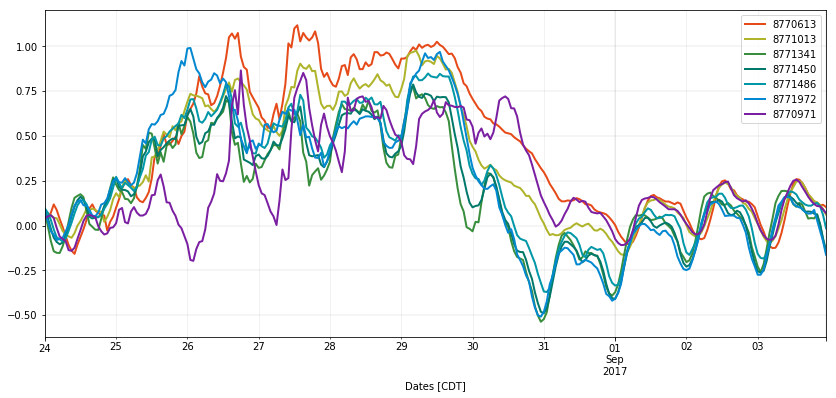

In [31]:
for buoy in buoys_ordered:
    # Exclude buoys outside the bay proper
    if buoy in ['B', '42035', '8770822', '8770777', 'OLDR', '8770808']:
        continue
    if 'Water Level [m]' in buoys[buoy]['vars']:
        df[buoy + ': Water Level [m]']['2017-08-24':'2017-09-3'].plot(figsize=(14,6), label=buoy, 
                                                                      legend=True, color=buoys[buoy]['color'], 
                                                                      lw=2, grid=True)
plt.grid(which='major', lw=1.5, color='k', alpha=0.05)
plt.grid(which='minor', lw=1, color='k', alpha=0.05)

## Salinity

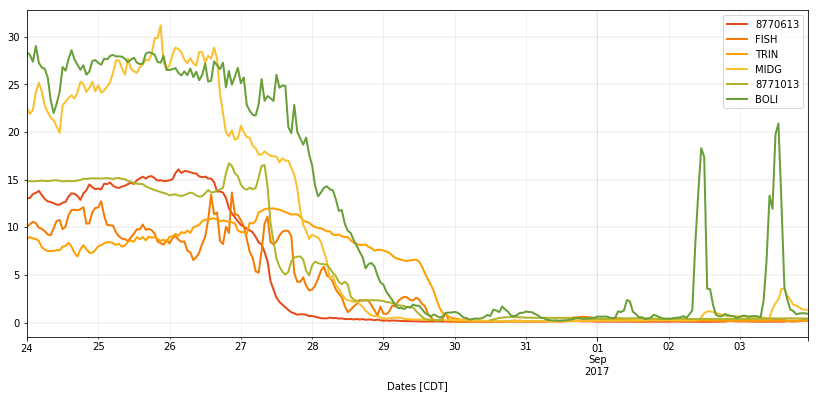

In [32]:
# Choose colors that are more distinct
for buoy in buoys_main:
    if 'Salinity' in buoys[buoy]['vars']:
        df[buoy + ': Salinity']['2017-08-24':'2017-09-3'].plot(figsize=(14,6), label=buoy, legend=True, color=buoys[buoy]['color'], lw=2)#, alpha=0.4)

plt.grid(which='major', lw=1.5, color='k', alpha=0.05)
plt.grid(which='minor', lw=1, color='k', alpha=0.05)

## Winds

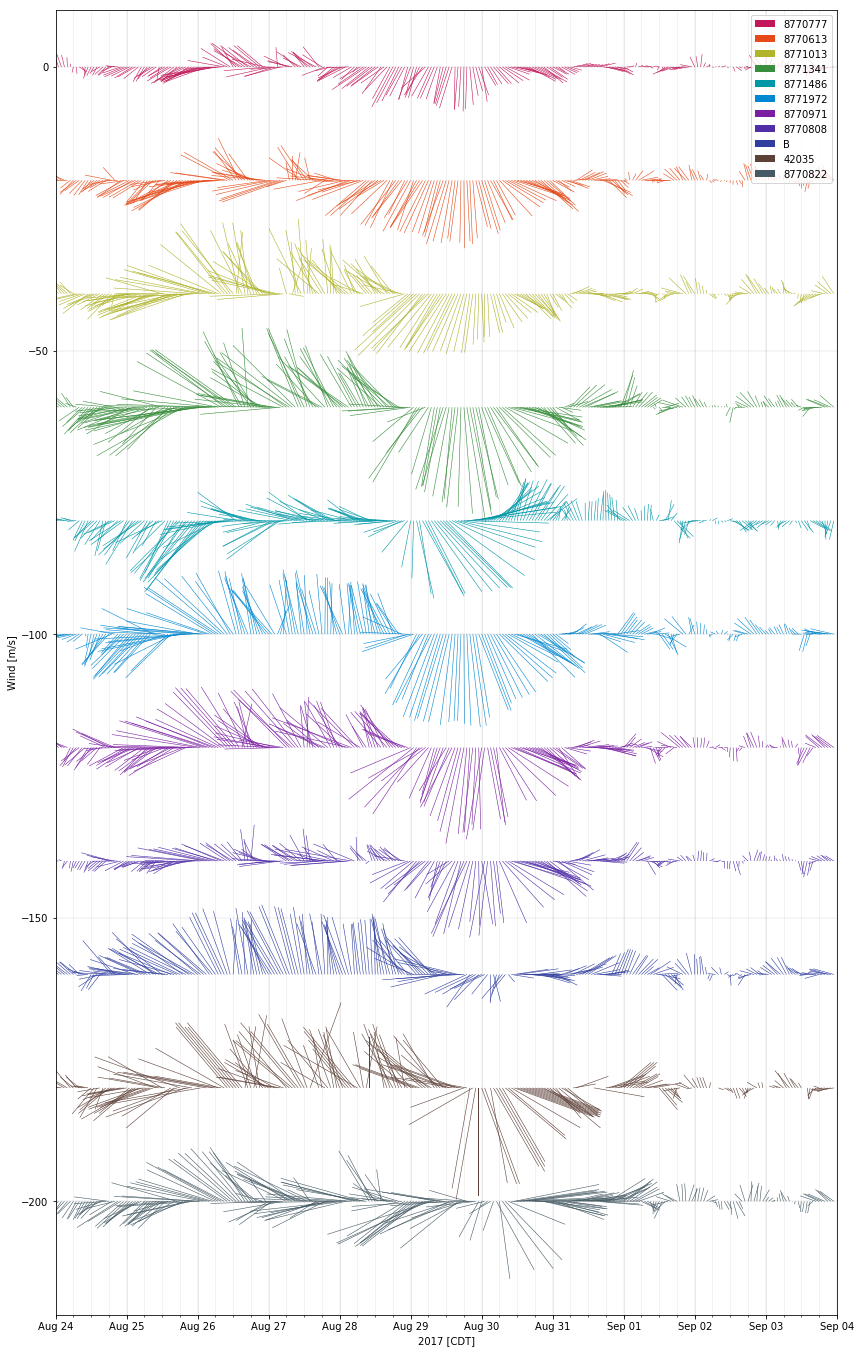

In [33]:
df['idx'] = date2num(pd.to_datetime(df.index).to_pydatetime())
ddt = 1
width=.1

fig, ax = plt.subplots(1, 1, figsize=(14,24))
ax.set_ylim(-220,10)
ax.set_xlim(df['idx'].loc['2017-08-24 00:00:00'], df['idx'].loc['2017-09-4 00:00:00'])
i = 0
for buoy in buoys_ordered:
    if 'East [m/s]' in buoys[buoy]['vars'] and not df['2017-08-24':'2017-09-3'][buoy + ': East [m/s]'].isnull().all():
        ax.quiver(df['idx'][::ddt]['2017-08-24':'2017-09-3'], np.zeros(len(df[::ddt]['2017-08-24':'2017-09-3'])) - i*20, df[::ddt]['2017-08-24':'2017-09-3'][buoy + ': East [m/s]'], df[::ddt]['2017-08-24':'2017-09-3'][buoy + ': North [m/s]'], headaxislength=0,
                  headlength=0, width=width, units='y', scale_units='y', scale=1, color=buoys[buoy]['color'], label=buoy)
        i += 1

import matplotlib as mpl
minor = mpl.dates.HourLocator(byhour=np.arange(0,24,6))
ax.xaxis.set_minor_locator(minor)
major = mpl.dates.HourLocator(byhour=np.arange(0,24,24))
ax.xaxis.set_major_locator(major)
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%b %d'))
# if df.index[0].year != df.index[-1].year:
#     ax.text(0.98, -0.05, df.index.strftime("%Y")[0] + '-' + df.index.strftime("%Y")[-1],
#             transform=ax.transAxes, rotation=30)
# else:
#     ax.text(0.98, -0.15, df.index.strftime("%Y")[-1],
#             transform=ax.transAxes, rotation=30)
ax.grid(which='major', lw=1.5, color='k', alpha=0.05)
ax.grid(which='minor', lw=1, color='k', alpha=0.05)

handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right')   

ax.set_xlabel('2017 [CDT]')
ax.set_ylabel('Wind [m/s]')


# 1. Calculate channel flux from Galveston Bay

We calculate the flux through Galveston channel, $Q_{ch}$, in two ways — one directly from data and one through conservation of salinity in the bay. The first should be good over time, regardless of the salinity state, but has large error because the data is at a single $x,y,z$ location and is assumed to be uniform across the whole channel. The second is only valid when there is salinity in the bay which is not true during the major flooding event. However, we use it to reduce the error in the first method.

We assume that any outflow from the West and East bays is insignificant.

## 1a. From current meter in channel

$\begin{align}
Q_{ch} &= \iint_A U_{ch}(t) \, dA  \\
~ &\approx U_{ch} \cdot A
\end{align}$

where the integral of the along-channel velocity, $U_{ch}$, of a cross-section of Galveston channel is approximated by the along-channel velocity at buoy `g06010` times the approximate cross-sectional area, width $W$ times depth $D$. Instead of estimating the cross-sectional area of the channel, we leave this constant as a parameter to be estimated by comparing with the salinity conservation method. This parameter will include errors in the method too.

In [34]:
# negative sign because original orientation is positive into the bay
Uch = -df['g06010: Along [cm/s]']/100.  # m/s

## 1b. From salinity conservation

Conservation of salinity in Galveston Bay gives:

$
\begin{align}
\partial (S V)/\partial t &= S_{in}Q_{in} - S_{out} Q_{ch} \\
\partial (S V)/\partial t &= - S_{ch} Q_{ch} \\
\Rightarrow Q_{ch} &= -\frac{1}{S_{ch}} \frac{\partial (S V)}{\partial t}
\end{align}
$

where the input salinity, $S_{in}$, is assumed to be fresh so $S_{in}=0$ and $S_{ch}$ is the output salinity.

We have data from TWDB station BOLI to represent $S_{ch}$ but the resulting inflow calculation has a linear relationship with the salinity representation of the water in the bay, $S(t)$, so we need to treat this carefully in particular.

Note that we include the main and east bays of Galveston for the salinity conservation calculation because previous work (Powell 2003, Rayson 2015) have shown connectivity between salinity in these two areas but limited mixing with the West Bay.

The derivative term is calculated as follows, where the volume is approximated as the surface area times the average depth plus a representative sea surface height:

$
\begin{align}
    \frac{\partial (S V)}{\partial t} &= A \frac{\partial [S(H+\eta)]} {\partial t}.
\end{align}
$

We calculate this term for both of the bays (main and east).

Surface area of the bay is calculated using bathymetry of Galveston Bay as calculated in `bathy` notebook.

In [35]:
# East bay surface area
d = np.load(base + 'bathy_galv_east.npz')
bathye = d['bathy']; dx = d['dx']; dy = d['dy']
Ae = np.nansum(~np.isnan(bathye)*dx*dy)

# Main bay surface area
bathym = np.load(base + 'bathy_galv_main.npz')['bathy']
Am = np.nansum(~np.isnan(bathym)*dx*dy)

In [36]:
# Average depths
bathymeane = -np.nansum(bathye)/(~np.isnan(bathye)).sum()
bathymeanm = -np.nansum(bathym)/(~np.isnan(bathym)).sum()

In [37]:
Sm = df['MIDG: Salinity'] # df['8771013: Salinity']
Sout = df['BOLI: Salinity']

etam = df['8771013: Water Level [m]']['2017-08-4':]
etae = df['8770971: Water Level [m]']['2017-08-4':]

SV = Am*Sm*(etam + bathymeanm) + Ae*Sm*(etae + bathymeane)
dSVdt = SV.diff()/3600.  # divide by 3600 seconds for an hour frequency

We can then calculate the pre-storm channel flux as follows from salinity conservation:

In [38]:
Qch1b = dSVdt/-Sout

In [39]:
ind = (~Uch[dstart:'2017-08-24'].isnull()) * (~Qch1b[dstart:'2017-08-24'].isnull()).values
p = np.polyfit(Uch[dstart:'2017-08-24'].loc[ind], Qch1b[dstart:'2017-08-24'].loc[ind], 1)  # fit a straight line (order is 1)

/Users/kthyng/miniconda3/envs/cart/lib/python3.6/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


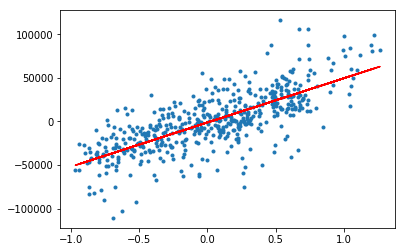

In [40]:
plt.plot(Uch[dstart:'2017-08-24'], Qch1b[dstart:'2017-08-24'], '.')
plt.plot(Uch[dstart:'2017-08-24'], np.polyval(p, Uch[dstart:'2017-08-24']), 'r')

In [41]:
p

array([ 50848.0156369,  -1238.2068852])

In [42]:
Qch = Uch*p[0]

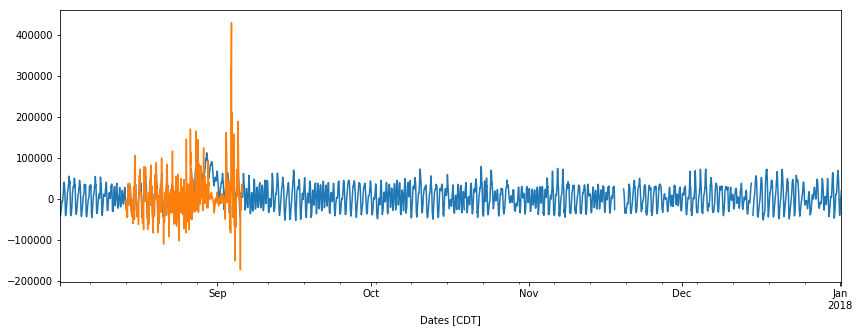

In [43]:
ax = Qch.plot()
Qch1b['2017-8-14':'2017-9-5'].plot(ax=ax, figsize=(14,5))

Therefore, we should scale $U_{out}$ calculated from volume conservation to salinity conservation by multiplying it by the following:

In [44]:
p[0]

50848.015636902099

This number is the equivalent area of the channel cross-section — it is the area times a factor to account for errors in assuming a constant along-channel velocity across the channel and with depth.

The cross-sectional area is approximately:

In [45]:
W = 1500  # 1500 is what sat image shows might be closer for where flow goes  # 2500  # meters, calculated with length tool in google earth

D = (250*22 + 325*34 + 1050*45 + 425*35 + 50*24 + 100*17 + 300*1)/2500  # feet
D /= 3.28084  # meters
W*D  # m^2

14973.299520854416

meaning that the equivalent area is

In [46]:
-p[0]/(W*D)

-3.3959125419272036

times the area of the channel there and therefore is in the right ballpark.

# 2. Calculate inflow to Galveston Bay

For this we use a control volume of Galveston Bay with the previously-calculated function for $Q_{ch}$

$\begin{align}
\partial V/\partial t &= Q_{in} - Q_{ch} ~~~~~~~~(1) \\
\Rightarrow Q_{in}(t) &= Q_{ch}(t) + \partial V/\partial t
\end{align}$

where $V(t)$ is the volume of Galveston Bay, $Q_{in}(t)$ is the water input to Galveston Bay, and $Q_{ch}(t)$ is the flux in Galveston Bay channel.


## 2a. Calculate volume of bay in time

Assuming that any change in x/y area of the bay due to flooding is limited, we have the following:

$\begin{align}
\partial V/\partial t &= \partial /\partial t \left(\iiint dxdydz\right) \\
~ &= \partial /\partial t \left(\iint \int_{z=h}^{0} dzdxdy + \iint \int_{z=0}^{\eta} dzdxdy\right) \\
~ &= \partial /\partial t \left(\iint \int_{z=h}^{0} dzdxdy\right) + \partial /\partial t \left(\iint\int_{z=0}^{\eta} dzdxdy\right) \\
~ &= \partial /\partial t \left(\iint\int_{z=0}^{\eta} dzdxdy\right) ~~~~~(2)\\
~ &= A \partial /\partial t \int_{z=0}^{\eta} dz \\
~ &= A \partial \eta/\partial t
\end{align}$


For volume conservation, we use all three bays together since the sea level is connected across all of the bays, and the sea level from the main bay through the West Bay, which is the most disconnected, does appear to be connected:

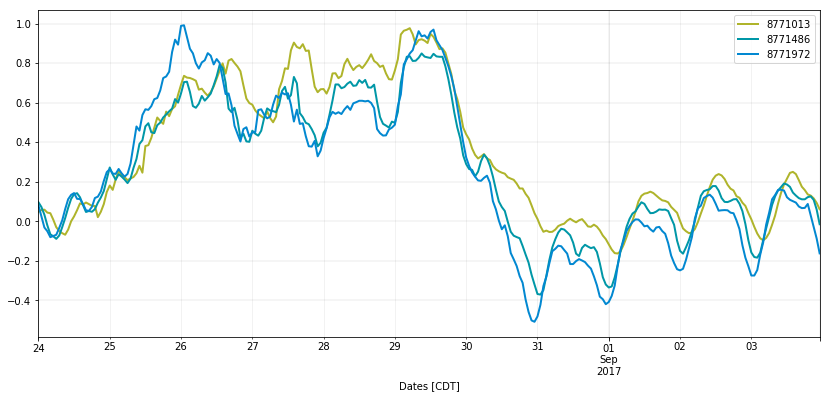

In [47]:
for buoy in ['8771013', '8771486', '8771972']:
    df[buoy + ': Water Level [m]']['2017-08-24':'2017-09-3'].plot(figsize=(14,6), label=buoy, 
                                                                  legend=True, color=buoys[buoy]['color'], 
                                                                  lw=2, grid=True)
plt.grid(which='major', lw=1.5, color='k', alpha=0.05)
plt.grid(which='minor', lw=1, color='k', alpha=0.05)

In [48]:
# West bay surface area
d = np.load(base + 'bathy_galv_west.npz')
bathyw = d['bathy']; dx = d['dx']; dy = d['dy']
Aw = np.nansum(~np.isnan(bathyw)*dx*dy)

In [49]:
# sea level at buoy 8771013 for main bay
detamdt = df['8771013: Water Level [m]'].diff()['2017-08-4':]/3600.  # divide by 3600 seconds for an hour frequency
dVdt = Am * detamdt

# west bay
detawdt = df['8771972: Water Level [m]'].diff()['2017-08-4':]/3600.  # divide by 3600 seconds for an hour frequency
dVwdt = Aw * detawdt

# east bay
detaedt = df['8770971: Water Level [m]'].diff()['2017-08-4':]/3600.  # divide by 3600 seconds for an hour frequency
dVedt = Ae * detaedt

In [50]:
Qin = Qch + dVdt + dVwdt + dVedt

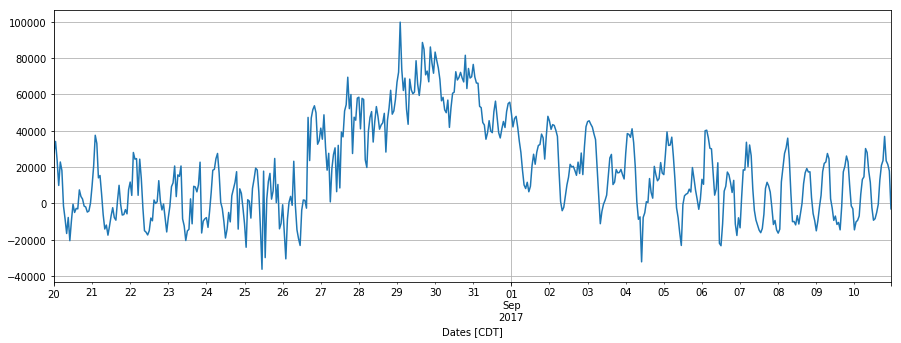

In [51]:
Qin['2017-8-20':'2017-9-10'].plot(figsize=(15,5), grid=True)

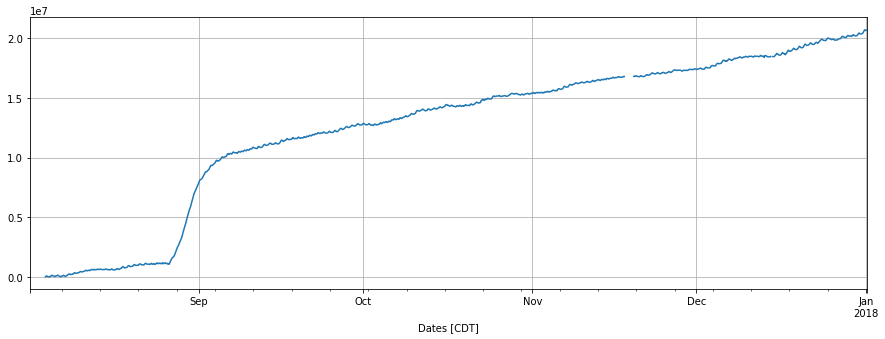

In [52]:
ax = Qin.cumsum().plot(figsize=(15,5), grid=True)

In [53]:
idx = date2num(pd.to_datetime(Qin[dstart:'2017-08-24'].index).to_pydatetime())
ind = ~Qin[dstart:'2017-08-24'].isnull()
p = np.polyfit(idx[ind], Qin[dstart:'2017-08-24'].cumsum().loc[ind], 1)  # fit a straight line (order is 1)

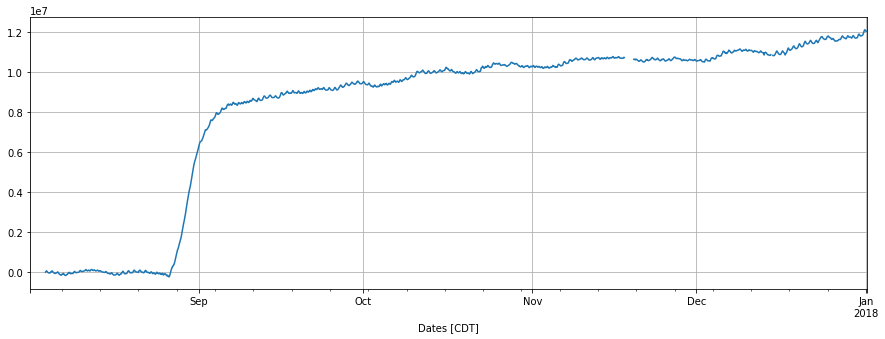

In [54]:
idx = date2num(pd.to_datetime(Qin.index).to_pydatetime())
Qindetrend = Qin.cumsum() - (p[0]*idx + p[1])
ax = Qindetrend.plot(figsize=(15,5), grid=True)

In [55]:
3600*Qin['2017-8-26 12:00':'2017-9-3'].sum()/1000**3  # km^3

30.412565621706044

In [56]:
3600*Qindetrend.loc['2017-9-3 23:00']/1000**3

27.909543703905037

## Compare with volume of Galveston Bay

Average depth of Galveston Bay:

In [59]:
# Average depths
bathymeanw = np.nansum(bathyw)/(~np.isnan(bathyw)).sum()
bathymeane = np.nansum(bathye)/(~np.isnan(bathye)).sum()
bathymeanm = np.nansum(bathym)/(~np.isnan(bathym)).sum()

# Overall average depth
bathymean = (Aw*bathymeanw + Ae*bathymeane + Am*bathymeanm)/(Aw+Ae+Am)  # meters

# Galveston Bay volume
(Am*-bathymean)/1000**3  # km^3

2.5002451963841339

This means that the flood water could fill the bay approximately:

In [60]:
28/2.5

11.2

times.